In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

In [2]:
import pickle

In [3]:
with open('subset_homework.pckl','rb') as f:
    data = pickle.load(f)

In [4]:
data.keys()

dict_keys(['class_id_0', 'class_id_1'])

In [5]:
len(data['class_id_0'])

2220

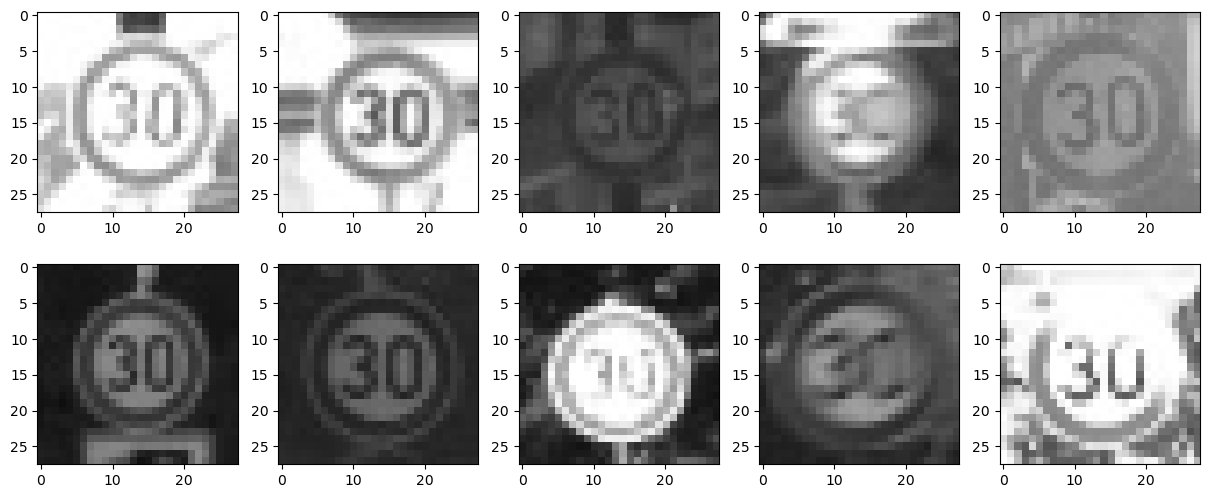

In [6]:
for idx in range(10):
    plt.subplot(2,5,idx+1)
    plt.imshow(data['class_id_0'][idx], cmap='gray', vmin=0, vmax=255)

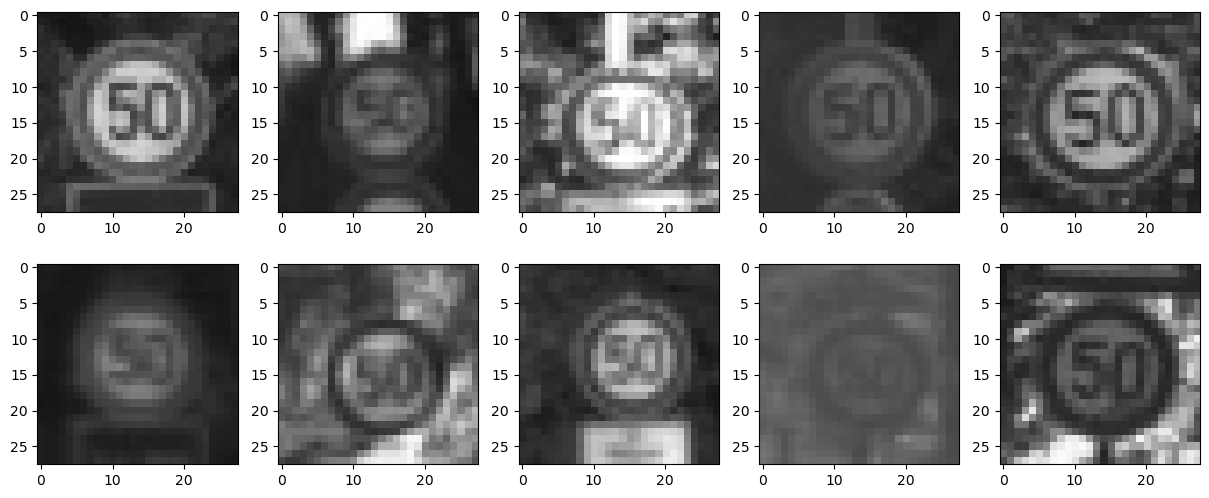

In [7]:
for idx in range(10):
    plt.subplot(2,5,idx+1)
    plt.imshow(data['class_id_1'][idx], cmap='gray', vmin=0, vmax=255)

In [8]:
# Put both classes together and shuffle the data
images = data['class_id_0'] + data['class_id_1']
labels = [0] * len(data['class_id_0']) + [1] * len(data['class_id_1'])
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [9]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.042496681213378906


In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val, y_train, y_val = train_test_split(pixels, labels, test_size=0.2, random_state=42,shuffle=True)

In [36]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.05),
    Dense(32, activation='relu'),
    Dropout(0.05),
    Dense(1, activation='sigmoid')
])

In [37]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,641 (408.75 KB)

 Trainable params: 104,641 (408.75 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [39]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [40]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5545 - loss: 0.6836 - val_accuracy: 0.6499 - val_loss: 0.6379
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6611 - loss: 0.6361 - val_accuracy: 0.6935 - val_loss: 0.6116
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7020 - loss: 0.6031 - val_accuracy: 0.6924 - val_loss: 0.5905
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7152 - loss: 0.5920 - val_accuracy: 0.7360 - val_loss: 0.5650
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7526 - loss: 0.5550 - val_accuracy: 0.7539 - val_loss: 0.5387
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7783 - loss: 0.5301 - val_accuracy: 0.8143 - val_loss: 0.5045
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8011 - loss: 0.5138 - val_accuracy: 0.8456 - val_loss: 0.4743
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8239 - loss: 0.4730 - val_accuracy: 0.8255 - val_loss

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

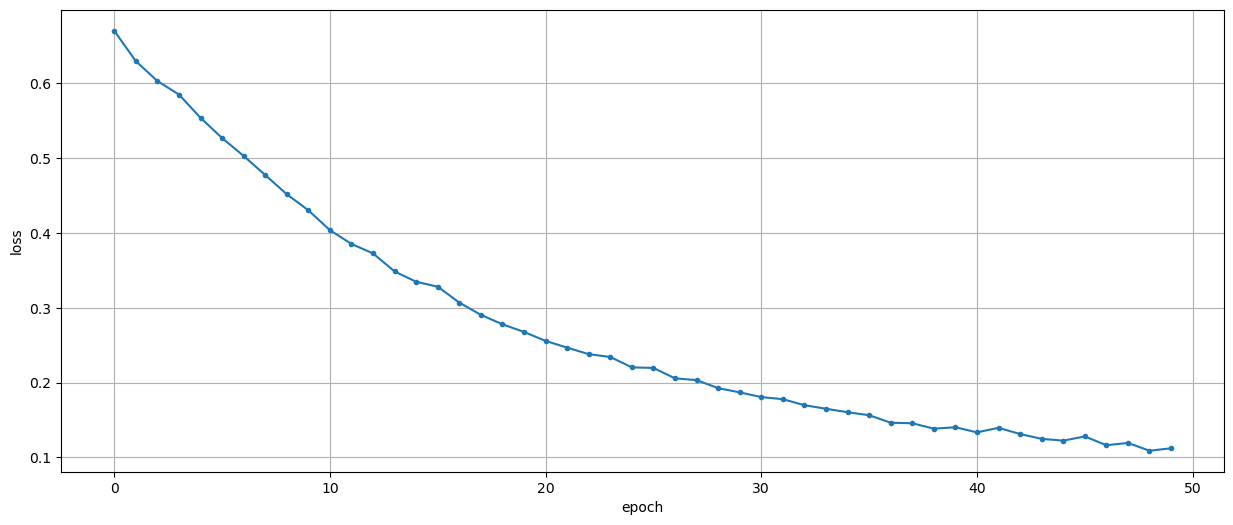

In [41]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [43]:
val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.9642


In [45]:
from sklearn.metrics import classification_report

# Отримання прогнозів на валідаційному наборі
y_val_pred_prob = model.predict(X_val)
y_val_pred = np.round(y_val_pred_prob)  # Перетворення ймовірностей в 0 або 1

# Виведення classification report
print(classification_report(y_val, y_val_pred, target_names=['30 km', '50 km']))


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

       30 km       0.99      0.94      0.96       444
       50 km       0.94      0.99      0.97       450

    accuracy                           0.96       894
   macro avg       0.97      0.96      0.96       894
weighted avg       0.97      0.96      0.96       894



In [46]:
def model_predict(image_28x28):
    """
    Args:
    - image_28x28 (numpy array)
    
    Returns:
    - prediction (int): 0 or 1.
    """
    if image_28x28.shape != (28, 28):
        raise ValueError("Image must be 28x28 in size.")
    img_vector = image_28x28.flatten().reshape(1, 784) / 255.0
    
    prediction_prob = model.predict(img_vector)
    prediction = np.round(prediction_prob).astype(int)
    
    plt.imshow(image_28x28, cmap='gray')
    plt.title(f"Predicted class: {prediction[0, 0]}")
    plt.axis('off')  
    plt.show()
    
    return prediction[0, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


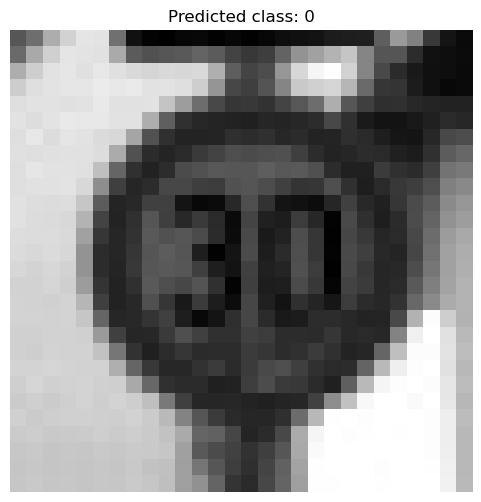

0

In [47]:
model_predict(data['class_id_0'][45])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


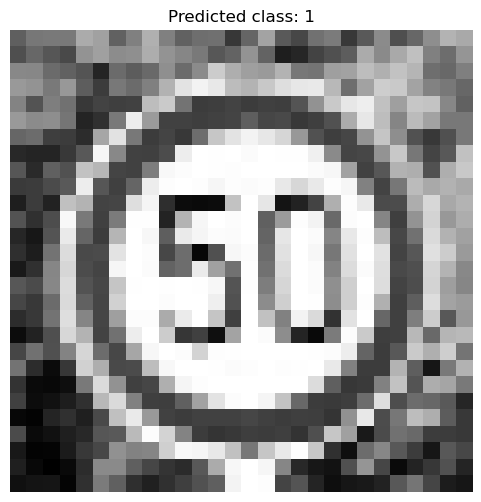

CPU times: total: 125 ms
Wall time: 196 ms


1

In [49]:
%%time
model_predict(data['class_id_1'][455])